<a href="https://colab.research.google.com/github/longbui23/Amazon-Sentiment-Analysis/blob/main/ttest_price_vs_number_of_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/ECON314: Amazon-Sentiment-Analysis

Mounted at /content/drive
/content/drive/My Drive/ECON314: Amazon-Sentiment-Analysis


In [ ]:
#import libraries
import numpy as np
import pandas as pd

import scipy.stats as stats
from statsmodels.stats.weightstats import ttest_ind

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [ ]:
#import data
df = pd.read_csv("Data/clean_data.csv")
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Length
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,374.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,214.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,12.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,76.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,223.0


In [ ]:
#classify price range
priceRange = []

for price in df['Price']:
    if price < 71.05:
        priceRange.append("Low price")
    elif 71.05 <= price < 116.99:
        priceRange.append("Low-Mid price")
    elif 116.99 <= price < 325.16:
        priceRange.append("Mid price")
    elif 325.16 <= price < 622.9:
        priceRange.append("Higher-mid price")
    else:
        priceRange.append("High-end price")


In [ ]:
#add a new column to the data
df['Price Ranges'] = priceRange

In [ ]:
df['Price Ranges'].value_counts()

Mid price           159605
Low price            79169
Low-Mid price        78550
Higher-mid price     59725
High-end price       20057
Name: Price Ranges, dtype: int64

In [ ]:
#count the total number of reviews for each price:
df['Reviews_Count'] = df.groupby('Price')['Reviews'].transform('count')

In [ ]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Length,Price Ranges,Reviews_Count
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,374.0,Mid price,4867
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,214.0,Mid price,4867
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,12.0,Mid price,4867
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,76.0,Mid price,4867
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,223.0,Mid price,4867


## Data Cleaning

In [ ]:
reviews_count = df['Reviews_Count']

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(reviews_count, 25)
Q3 = np.percentile(reviews_count, 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(reviews_count < lower_bound) | (reviews_count > upper_bound)]

print("Lower Bound is", lower_bound)
print("Upper Bound is", upper_bound)
print("Outliers in the Reviews_Count column:")
print(outliers)

Lower Bound is -2539.0
Upper Bound is 5149.0
Outliers in the Reviews_Count column:
                             Product Name       Brand Name   Price  Rating  \
8829    Apple iPhone 4 8GB - White - AT&T            Apple  179.99       5   
8830    Apple iPhone 4 8GB - White - AT&T            Apple  179.99       5   
8831    Apple iPhone 4 8GB - White - AT&T            Apple  179.99       1   
8832    Apple iPhone 4 8GB - White - AT&T            Apple  179.99       5   
8833    Apple iPhone 4 8GB - White - AT&T            Apple  179.99       1   
...                                   ...              ...     ...     ...   
396732          Zte Zinger Z667t Unlocked  ZTE Corporation   39.99       2   
396733          Zte Zinger Z667t Unlocked  ZTE Corporation   39.99       1   
396734          Zte Zinger Z667t Unlocked  ZTE Corporation   39.99       5   
396735          Zte Zinger Z667t Unlocked  ZTE Corporation   39.99       5   
396736          Zte Zinger Z667t Unlocked  ZTE Corporation 

In [ ]:
#remove outliers
#df_interquantile = df[df['Reviews_Count'] <7191.0]
df_interquantile = df[(reviews_count > lower_bound) & (reviews_count < upper_bound)]
df_interquantile.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Length,Price Ranges,Reviews_Count
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,374.0,Mid price,4867
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,214.0,Mid price,4867
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,12.0,Mid price,4867
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,76.0,Mid price,4867
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,223.0,Mid price,4867


## Data Transformation




In [ ]:
#getting 2 samples, one sample for low price and the other for high-end price
lowPriceReviews = df_interquantile[df_interquantile['Price Ranges'] == "Low price"]['Reviews_Count']
print(lowPriceReviews)
highEndPriceReviews = df_interquantile[df_interquantile['Price Ranges'] == "High-end price"]['Reviews_Count']
print(highEndPriceReviews)

118       4813
119       4813
120       4813
121       4813
122       4813
          ... 
396707      95
396708      95
396709      95
396710      95
396711      95
Name: Reviews_Count, Length: 55448, dtype: int64
447       5045
452          7
453          7
454          7
455          7
          ... 
387518    5045
387519    5045
387520    5045
387521    5045
387522    5045
Name: Reviews_Count, Length: 20057, dtype: int64


**Normal Distribution Assumption**

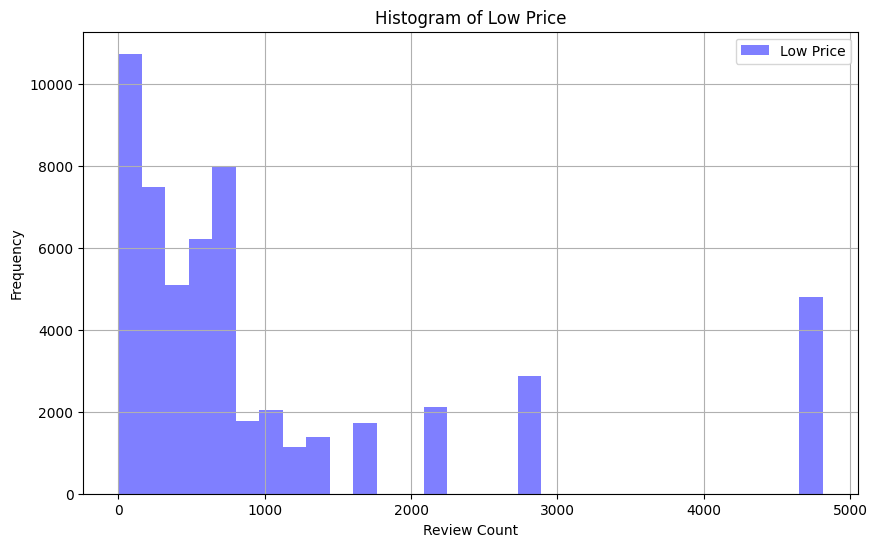

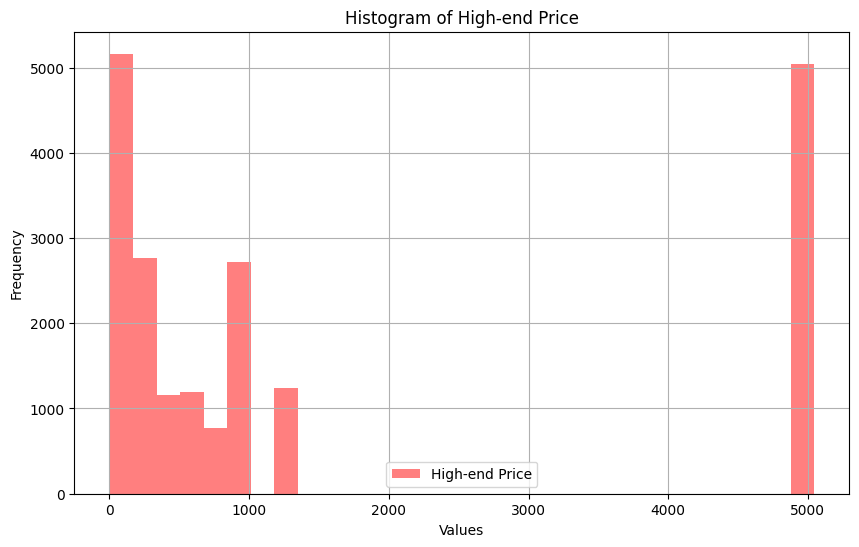

In [ ]:
# Plot histogram for sample 1
plt.figure(figsize=(10, 6))
plt.hist(lowPriceReviews, bins=30, alpha=0.5, color='blue', label='Low Price')
plt.title('Histogram of Low Price')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plot histogram for sample 2
plt.figure(figsize=(10, 6))
plt.hist(highEndPriceReviews, bins=30, alpha=0.5, color='red', label='High-end Price')
plt.title('Histogram of High-end Price')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#we can see that the distribution is skewed. We will perform log10() transformation
df['Reviews_Count_log10'] = np.log10(df['Reviews_Count'])

In [ ]:
#getting 2 new samples, one sample for low price and the other for high-end price
lowPriceReviews2 = df[(df['Price Ranges'] == "Low price")]['Reviews_Count_log10']
print(max(lowPriceReviews2))
highEndPriceReviews2 = df[(df['Price Ranges'] == "High-end price") ]['Reviews_Count_log10']
print(highEndPriceReviews2)

3.84279639517558
447       3.702861
452       0.845098
453       0.845098
454       0.845098
455       0.845098
            ...   
387518    3.702861
387519    3.702861
387520    3.702861
387521    3.702861
387522    3.702861
Name: Reviews_Count_log10, Length: 20057, dtype: float64


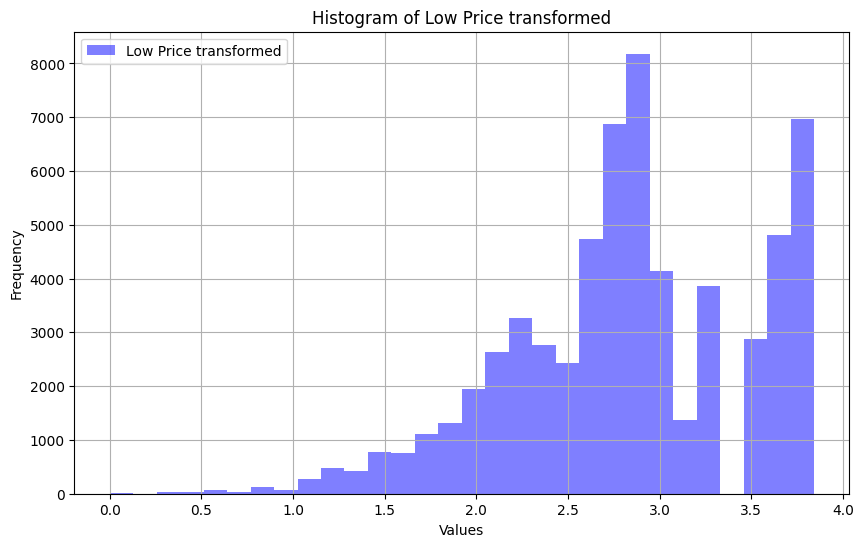

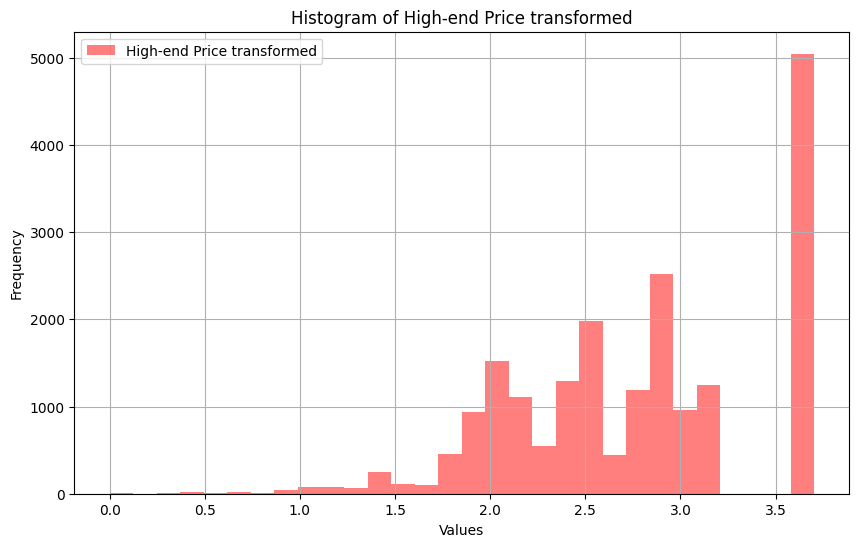

In [ ]:
# Plot histogram for sample 1
plt.figure(figsize=(10, 6))
plt.hist(lowPriceReviews2, bins=30, alpha=0.5, color='blue', label='Low Price transformed')
plt.title('Histogram of Low Price transformed')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plot histogram for sample 2
plt.figure(figsize=(10, 6))
plt.hist(highEndPriceReviews2, bins=30, alpha=0.5, color='red', label='High-end Price transformed')
plt.title('Histogram of High-end Price transformed')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

## T-test for all pairs of price range

In [ ]:
price_ranges = df['Price Ranges'].unique()

# Iterate through all combinations of price ranges
for price_range1, price_range2 in combinations(price_ranges, 2):
    # Select the data for the two price ranges
    data1 = df[df['Price Ranges'] == price_range1]['Reviews_Count_log10']
    data2 = df[df['Price Ranges'] == price_range2]['Reviews_Count_log10']

    # Perform Levene's test to check for equal variances
    levene_test = stats.levene(data1, data2)

    if levene_test[1] >= 0.05:
        # If p-value from Levene's test is >= 0.05, use equal variance t-test
        t_statistic, p_value = stats.ttest_ind(data1, data2, equal_var=True)
    else:
        # If p-value from Levene's test is < 0.05, use Welch's t-test (unequal variance t-test)
        t_statistic, p_value = stats.ttest_ind(data1, data2, equal_var=False)

    # Print the results
    print(f"T-test results for {price_range1} vs {price_range2}:")
    print(f"Test statistic: {t_statistic:.15f}, p-value: {repr(p_value)}")
    if p_value < 0.05:
        print("The difference is statistically significant.")
    else:
        print("The difference is not statistically significant.")
    print()


T-test results for Mid price vs Low price:
Test statistic: 47.139397913713623, p-value: 0.0
The difference is statistically significant.

T-test results for Mid price vs Low-Mid price:
Test statistic: 11.801844960580389, p-value: 3.971344417609525e-32
The difference is statistically significant.

T-test results for Mid price vs High-end price:
Test statistic: 39.109862603990422, p-value: 0.0
The difference is statistically significant.

T-test results for Mid price vs Higher-mid price:
Test statistic: 123.689520626604903, p-value: 0.0
The difference is statistically significant.

T-test results for Low price vs Low-Mid price:
Test statistic: -32.411342617338022, p-value: 1.7900037828170247e-229
The difference is statistically significant.

T-test results for Low price vs High-end price:
Test statistic: 9.854029051928361, p-value: 7.078262699192813e-23
The difference is statistically significant.

T-test results for Low price vs Higher-mid price:
Test statistic: 47.592588373831411, p-va

Conclusions: Differences between groups are not coincidence.